In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon
from scipy.ndimage import zoom,rotate
import cv2


In [28]:
def radon_transform_manual(image, num_angles=100, num_detectors=1000):
    # Change the resolution of the image if num_detectors is specified
    if num_detectors is not None:
        image = cv2.resize(image, (num_detectors, num_detectors))

    angles = np.linspace(-180, 0, num_angles, endpoint=False)
    radon_transformed = np.zeros((num_angles, len(image[0])))

    for i, angle in enumerate(angles):
        rotated_image = rotate(image, angle, reshape=False)  
        radon_transformed[i, :] = np.sum(rotated_image, axis=0)

    return np.transpose(radon_transformed)

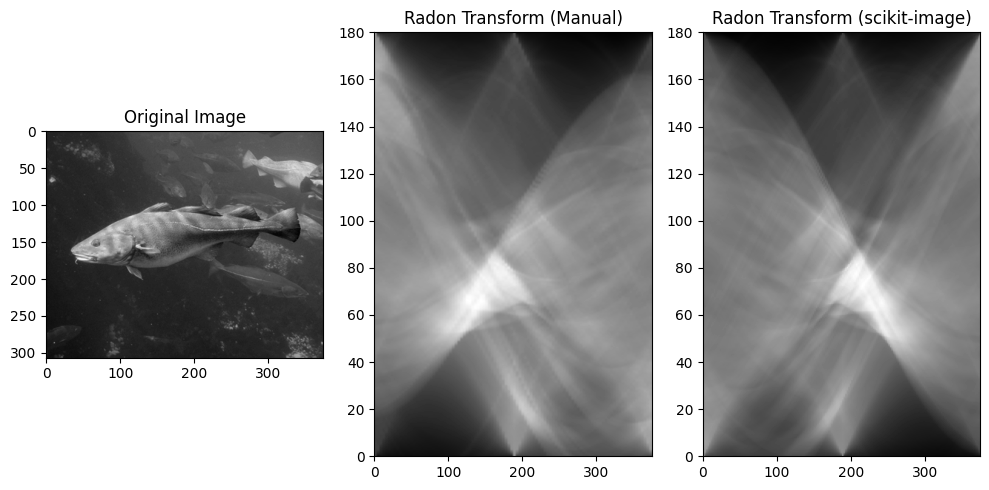

In [29]:
image=cv2.imread('./fish.bmp',cv2.IMREAD_GRAYSCALE)

radon_transform_manual_result = radon_transform_manual(image)
radon_transform_scikit = radon(image)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(132)
plt.title('Radon Transform (Manual)')
plt.imshow(radon_transform_manual_result, cmap='gray', extent=(0, len(image[0]), 0, 180), aspect='auto')

plt.subplot(133)
plt.title('Radon Transform (scikit-image)')
plt.imshow(radon_transform_scikit, cmap='gray', extent=(0, len(image[0]), 0, 180), aspect='auto')

plt.tight_layout()
plt.show()
